# Análisis del Número Óptimo de Activos

## Objetivo: Detectar automáticamente cuántos activos se necesitan

Este notebook analiza la frontera de diversificación para identificar el número óptimo de activos que maximiza el beneficio de la diversificación sin complejidad innecesaria.

**Dataset:** 1,758 observaciones × 60 activos  
**Método:** Simulación de Monte Carlo + Análisis de rendimientos decrecientes

In [1]:
# Importaciones
import sys
sys.path.insert(0, '../codigo')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analisis_numero_optimo import AnalisisNumeroOptimo
from extractor_datos import ExtractorDatos
import warnings

warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## Paso 1: Cargar Datos

In [2]:
# Cargar datos
ruta_datos = "../../data/prod_long_sharpe_u60_20260125_v1_train_dataset.csv"
extractor = ExtractorDatos(ruta_datos)
datos = extractor.cargar_datos()
extractor.validar_datos()

print(f"\n✓ Datos cargados: {datos.shape}")
print(f"  Retornos diarios de {datos.shape[1]} activos durante {datos.shape[0]} días")

Extractor inicializado
Ruta de datos: ..\..\data\prod_long_sharpe_u60_20260125_v1_train_dataset.csv

PASO 1: CARGAR DATOS

Cargando datos desde: prod_long_sharpe_u60_20260125_v1_train_dataset.csv
✓ Detectado formato Excel
[OK] Datos cargados correctamente
  Dimensiones: 1758 filas × 60 columnas
  Memoria: 0.80 MB

PASO 2: VALIDAR DATOS

Valores faltantes:
  Total de NaN: 0
  [OK] No hay valores faltantes

Tipos de datos:
  Tipos únicos: [dtype('float64')]

Valores infinitos: 0

Rango de valores:
  Mínimo: -0.554316
  Máximo: 0.271702
  Media: 0.000297

[OK] Validación completada

✓ Datos cargados: (1758, 60)
  Retornos diarios de 60 activos durante 1758 días


## Paso 2: Simular Frontera de Diversificación

Ejecutamos simulaciones Monte Carlo para cada N de activos y detectamos el punto de rendimientos decrecientes.

In [3]:
# Inicializar analizador
analizador = AnalisisNumeroOptimo(datos)

# Simular frontera de diversificación
df_frontera = analizador.simular_frontera_diversificacion(
    n_valores=[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 60],
    n_simulaciones=150  # Más simulaciones para mayor precisión
)


[OK] Análisis de número óptimo inicializado
  Activos disponibles: 60
  Observaciones: 1758

SIMULACIÓN: FRONTERA DE DIVERSIFICACIÓN
Valores de N a probar: [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 60]
Simulaciones por N: 150
Total de simulaciones: 2550
--------------------------------------------------------------------------------

Procesando N=2...

Procesando N=3...

Procesando N=4...

Procesando N=5...

Procesando N=6...

Procesando N=7...

Procesando N=8...

Procesando N=9...

Procesando N=10...

Procesando N=12...

Procesando N=15...

Procesando N=20...

Procesando N=25...

Procesando N=30...

Procesando N=40...

Procesando N=50...

Procesando N=60...

TABLA RESUMEN: FRONTERA DE DIVERSIFICACIÓN
  N |  Vol(%) |   ±Std |  Esp(%) |  Sis(%) |  Reduc
--------------------------------------------------------------------------------
  2 |    1.56 |   0.32 |   89.33 |   42.53 |    nan%
  3 |    1.38 |   0.22 |   82.34 |   55.43 |  11.42%
  4 |    1.26 |   0.16 |   78.56 |

## Paso 3: Detectar N Óptimo

In [4]:
# Detectar N óptimo automáticamente
n_optimo = analizador.detectar_n_optimo(umbral_reduccion=2.0)

print(f"\n[RESULTADO]")
print(f"  Número óptimo de activos: {n_optimo}")
print(f"  (Reducción marginal de volatilidad cae bajo 2%)")


DETECCIÓN DE N ÓPTIMO
Umbral de reducción marginal: 2.0%

✓ N=8 es óptimo (reducción: 1.71% < 2.0%)

Contexto:
  - Volatilidad en N=8: 1.13%
  - Riesgo específico: 61.93%
  - Riesgo sistemático: 78.00%
  - Mejora posible sumando activos: 1.94%

[RESULTADO]
  Número óptimo de activos: 8
  (Reducción marginal de volatilidad cae bajo 2%)


## Paso 4: Visualizar Frontera de Diversificación


Generando visualizaciones...


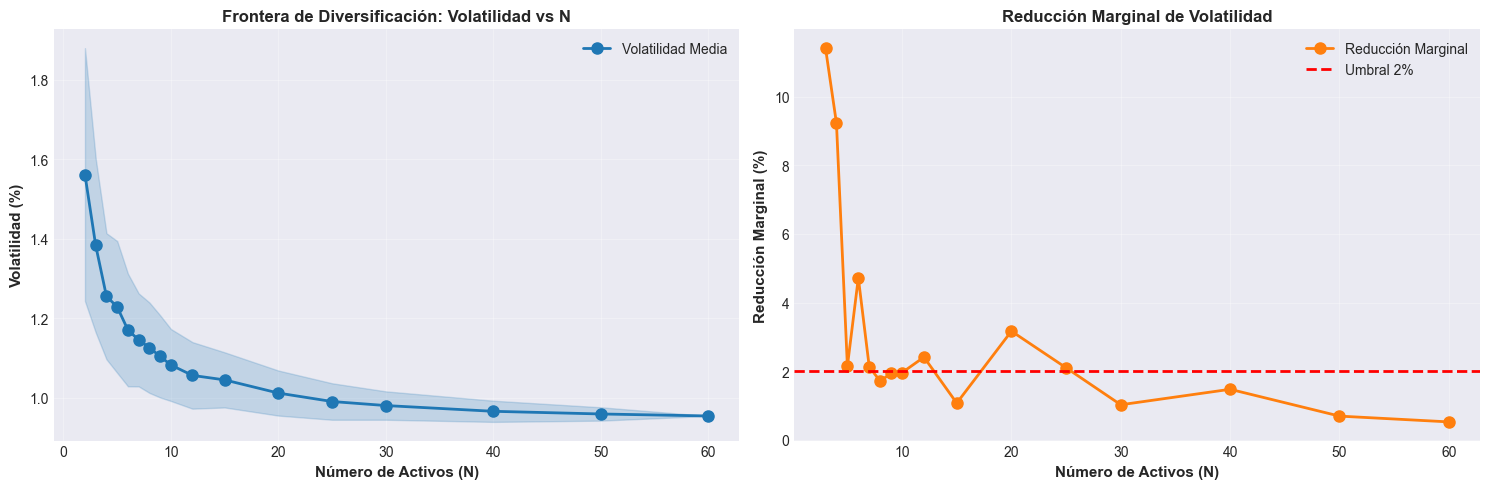

✓ Visualizaciones guardadas: analisis_numero_optimo.png


In [5]:
# Visualizar frontera
analizador.visualizar_frontera(figsize=(15, 5))

## Paso 5: Resumen Ejecutivo del Análisis

In [6]:
# Resumen completo del análisis
analizador.resumen_analisis()

# Información adicional
print("\n" + "="*80)
print("INTERPRETACIÓN DE RESULTADOS")
print("="*80)

print(f"\n1. FRONTERA DE DIVERSIFICACIÓN:")
print(f"   La volatilidad DECRECE cuando agregamos activos (ley de grandes números)")
print(f"   Sin embargo, el DECREMENTO MARGINAL disminuye progresivamente")

print(f"\n2. PUNTO DE INFLEXIÓN (N={n_optimo}):")
print(f"   A partir de N={n_optimo}, añadir más activos:")
print(f"   • Reduce volatilidad < 2% (rendimientos decrecientes)")
print(f"   • Aumenta complejidad computacional")
print(f"   • NO es justificable el costo-beneficio")

print(f"\n3. DESCOMPOSICIÓN DE RIESGO:")
riesgo_opt = df_frontera[df_frontera['n_activos'] == n_optimo].iloc[0]
print(f"   En N={n_optimo}:")
print(f"   • Riesgo específico: {riesgo_opt['riesgo_especifico_pct']:.2f}%")
print(f"   • Riesgo sistemático: {riesgo_opt['riesgo_sistematico_pct']:.2f}%")
print(f"   El riesgo sistemático NO se puede diversificar")

print(f"\n4. RECOMENDACIÓN:")
print(f"   Usar N={n_optimo} activos para próximas etapas de optimización")
print(f"   ✓ Mantiene beneficios de diversificación")
print(f"   ✓ Minimiza complejidad")
print(f"   ✓ Favorece estabilidad del modelo")

print("="*80)


RESUMEN DEL ANÁLISIS DE NÚMERO ÓPTIMO

DETECCIÓN DE N ÓPTIMO
Umbral de reducción marginal: 2.0%

✓ N=8 es óptimo (reducción: 1.71% < 2.0%)

Contexto:
  - Volatilidad en N=8: 1.13%
  - Riesgo específico: 61.93%
  - Riesgo sistemático: 78.00%
  - Mejora posible sumando activos: 1.94%

📊 HALLAZGOS PRINCIPALES:
  • N óptimo: 8 activos
  • Volatilidad óptima: 1.13%
  • Riesgo específico: 61.93%
  • Riesgo sistemático: 78.00%

💡 IMPLICACIONES:
  • Complejidad adicional para N>8: NO JUSTIFICADA
  • Mejora adicional añadiendo hasta N=50: -17.99%
  • Conclusión: 8 activos es prácticamente óptimo

🎯 RECOMENDACIÓN:
  Usar 8 activos para optimización posterior
  (Más activos aumentan complejidad sin beneficio significativo)


INTERPRETACIÓN DE RESULTADOS

1. FRONTERA DE DIVERSIFICACIÓN:
   La volatilidad DECRECE cuando agregamos activos (ley de grandes números)
   Sin embargo, el DECREMENTO MARGINAL disminuye progresivamente

2. PUNTO DE INFLEXIÓN (N=8):
   A partir de N=8, añadir más activos:
  